# [Integrating data using ingest](https://scanpy-tutorials.readthedocs.io/en/latest/integrating-data-using-ingest.html)

## Open the datasets

In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np

In [2]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

scanpy


In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,  dpi_save=300,frameon=False, figsize=(3, 3), facecolor='white', vector_friendly=True, transparent=True)

scanpy==1.7.0rc1 anndata==0.7.5 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


I'll follow the tutorial

In [5]:
cd /Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep

/Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep


In [6]:
adata = sc.read('./220310_concat_dataset.h5ad', cache=True)

In [7]:
adata

AnnData object with n_obs × n_vars = 10653 × 2629
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'clusters'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'clusters_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

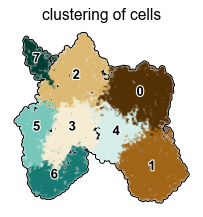

In [8]:
sc.tl.leiden(adata, key_added='clusters', resolution=0.33)
sc.pl.umap(adata, color=['clusters'], add_outline=True, legend_loc='on data', legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells', palette='BrBG', size=40)

### Marioni

In [9]:
adata_ref = sc.read('./Marioni_data_all.h5ad', var_names='SYMBOLS', cache=True)

## inspect the reference dataset

In [10]:
adata_ref

AnnData object with n_obs × n_vars = 139331 × 29452
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL'
    obsm: 'X_pca.corrected', 'X_umap'

In [11]:
adata_ref.obs.stage

cell_1         E6.5
cell_2         E6.5
cell_3         E6.5
cell_4         E6.5
cell_5         E6.5
               ... 
cell_139327    E8.5
cell_139328    E8.5
cell_139329    E8.5
cell_139330    E8.5
cell_139331    E8.5
Name: stage, Length: 139331, dtype: object

In [12]:
adata_ref

AnnData object with n_obs × n_vars = 139331 × 29452
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL'
    obsm: 'X_pca.corrected', 'X_umap'

### Eliminate doublets and debris

In [13]:
adata_ref.obs.doublet.value_counts()

0    125775
1     13556
Name: doublet, dtype: int64

In [14]:
adata_ref.obs.stripped.value_counts()

0    129865
1      9466
Name: stripped, dtype: int64

In [15]:
cell_type = adata_ref.obs.celltype.value_counts()
cell_type

NA                                23019
Epiblast                          14619
ExE ectoderm                      11758
ExE endoderm                       9339
Primitive Streak                   7265
Rostral neurectoderm               5392
Nascent mesoderm                   5028
Mesenchyme                         4979
Forebrain/Midbrain/Hindbrain       4854
Paraxial mesoderm                  3811
Intermediate mesoderm              3551
Surface ectoderm                   3523
Pharyngeal mesoderm                3086
Erythroid1                         2929
Haematoendothelial progenitors     2733
Erythroid3                         2697
Blood progenitors 2                2587
ExE mesoderm                       2571
Caudal epiblast                    2445
Somitic mesoderm                   2079
NMP                                2041
Mixed mesoderm                     1994
Gut                                1940
Allantois                          1820
Spinal cord                        1796


In [16]:
adata_ref.obsm['X_pca'] = adata_ref.obsm['X_pca.corrected']

In [17]:
adata_ref = adata_ref[adata_ref.obs.celltype != 'NA']
adata_ref

View of AnnData object with n_obs × n_vars = 116312 × 29452
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL'
    obsm: 'X_pca.corrected', 'X_umap', 'X_pca'

In [18]:
df3 = pd.DataFrame(adata_ref.obsm['X_pca']).dropna(axis = 0)
df3.shape

(116312, 50)

## Compare the datasets
 - adata_ref: switch the var_names from ENSEMBL to SYMBOL
 - adata_ref: change the Categorical Index to Index
 - make both unique
 - intersect the datasets

rownames(sce) <- rowData(sce)$SYMBOL # change from ensembl ID to gene symbols.

/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


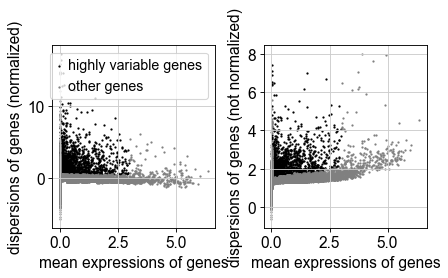

In [19]:
sc.pp.normalize_total(adata_ref, target_sum=5e4)
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(adata_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_ref)
adata_ref = adata_ref[:, adata_ref.var.highly_variable]

In [20]:
sc.pp.scale(adata_ref, max_value=10)

/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:810: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
adata_ref.var_names = adata_ref.var.SYMBOL
adata_ref.var_names = adata_ref.var_names.tolist()

In [22]:
adata.var_names_make_unique()
adata_ref.var_names_make_unique()

In [23]:
var_names = adata_ref.var_names.intersection(adata.var_names)

In [24]:
adata_ref = adata_ref[:, var_names].copy()
adata = adata[:, var_names].copy()

In [25]:
adata_ref.var_names

Index(['Sox17', 'Cpa6', 'Rdh10', 'Col9a1', 'Cfc1', 'Fhl2', 'Col3a1', 'Slc40a1',
       'Spats2l', 'D630023F18Rik',
       ...
       'Acta2', 'Ankrd1', 'Pcgf5', 'Fgfbp3', 'Cyp26a1', 'Pdlim1', 'Avpi1',
       'Pax2', 'Fgf8', 'Ina'],
      dtype='object', length=890)

Keys for annotations of observations/cells or variables/genes, e.g.,
        `'ann1'` or `['ann1', 'ann2']`

In [26]:
adata.var_names

Index(['Sox17', 'Cpa6', 'Rdh10', 'Col9a1', 'Cfc1', 'Fhl2', 'Col3a1', 'Slc40a1',
       'Spats2l', 'D630023F18Rik',
       ...
       'Acta2', 'Ankrd1', 'Pcgf5', 'Fgfbp3', 'Cyp26a1', 'Pdlim1', 'Avpi1',
       'Pax2', 'Fgf8', 'Ina'],
      dtype='object', length=890)

## ingest

Map labels and embeddings from adata_ref to adata based on a chosen representation. Here, I use adata_ref.obsm['X_pca'] to map cluster labels and the UMAP coordinates.

In [27]:
adata_ref

AnnData object with n_obs × n_vars = 116312 × 890
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca.corrected', 'X_umap', 'X_pca'

In [28]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)

In [29]:
sc.tl.umap(adata_ref)

... storing 'barcode' as categorical
... storing 'stage' as categorical
... storing 'theiler' as categorical
... storing 'celltype' as categorical
... storing 'colour' as categorical


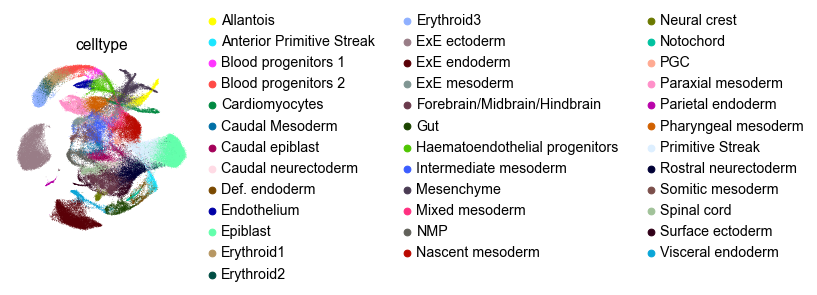

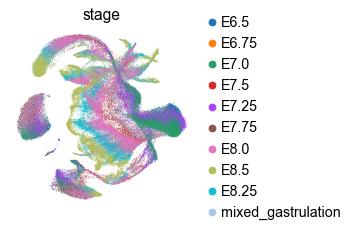

In [30]:
sc.pl.umap(adata_ref, color='celltype', save = 'ps_refdata_celltype.pdf')
sc.pl.umap(adata_ref, color='stage', save = 'ps_refdata_stage.pdf')

In [31]:
sc.tl.ingest(adata, adata_ref, obs=['celltype', 'stage'])

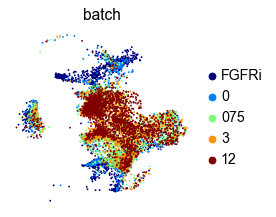

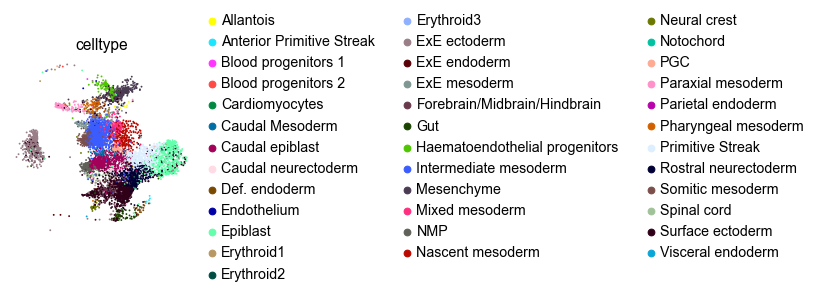

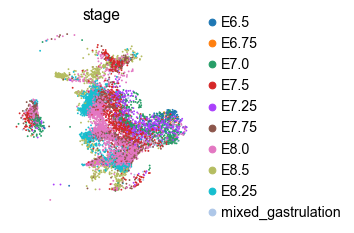

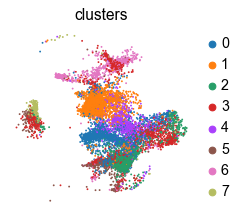

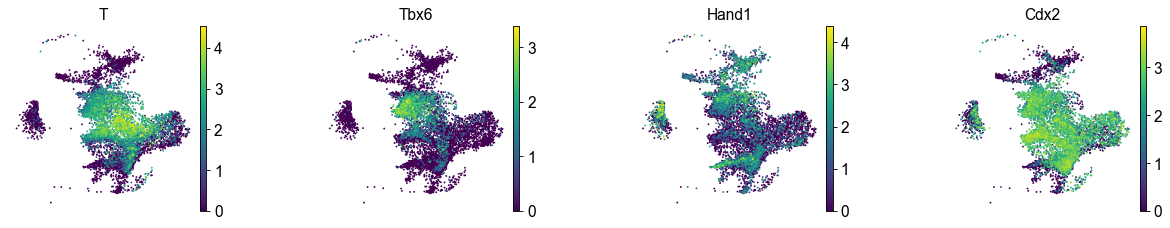

In [32]:
adata.uns['clusters_colors'] = adata_ref.obs['colour']  # fix colors
sc.pl.umap(adata, color=['batch'], wspace=0.5, save='ps_ingest_batch.pdf')
sc.pl.umap(adata, color=['celltype'], wspace=0.5, save='ps_ingest_celltype.pdf')
sc.pl.umap(adata, color=['stage'], wspace=0.5, save='ps_ingest_stage.pdf')
sc.pl.umap(adata, color=['clusters'], wspace=0.5, save='ps_ingest_clusters_33.pdf')
sc.pl.umap(adata, color=['T', 'Tbx6', 'Hand1', 'Cdx2'], wspace=0.5, save='ps_ingest_markers.pdf')

/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1183: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:371: MatplotlibDeprecationWarn

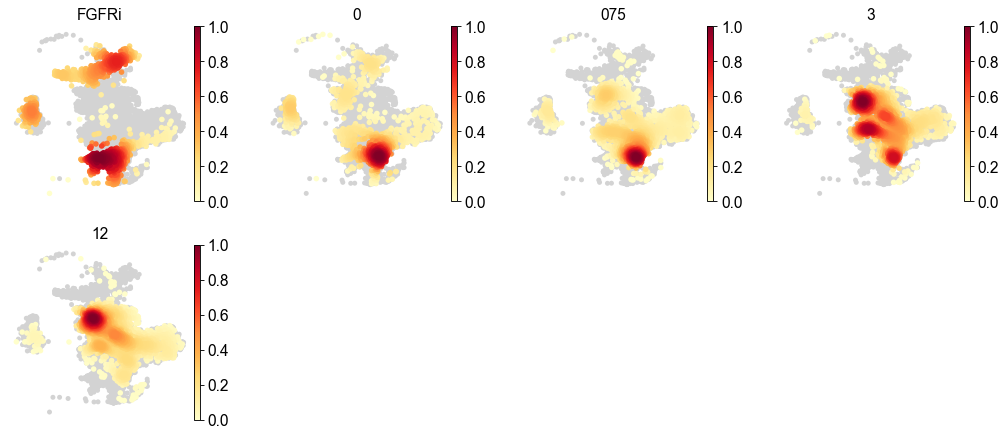

In [33]:
sc.tl.embedding_density(adata, groupby='batch')
sc.pl.embedding_density(adata, fg_dotsize=100, groupby='batch', save='ps_ingest_density_batch.pdf')

In [34]:
pd.crosstab(adata.obs.celltype, adata.obs.clusters)

clusters,0,1,2,3,4,5,6,7
celltype,,,,,,,,
Allantois,3,1,0,6,0,0,0,0
Anterior Primitive Streak,1,1,0,0,4,0,1,1
Blood progenitors 1,0,0,0,0,0,1,1,0
Blood progenitors 2,0,2,0,0,1,0,0,2
Caudal Mesoderm,26,2,0,0,41,0,0,0
Caudal epiblast,712,16,10,1,123,0,0,0
Caudal neurectoderm,135,0,2,3,2,0,0,0
Def. endoderm,0,0,7,5,6,1,1,2
Endothelium,0,0,0,0,0,1,1,0


In [35]:
pd.crosstab(adata.obs.celltype, adata.obs.stage)

stage,E6.5,E6.75,E7.0,E7.5,E7.25,E7.75,E8.0,E8.5,E8.25,mixed_gastrulation
celltype,,,,,,,,,,
Allantois,0,0,0,1,0,0,9,0,0,0
Anterior Primitive Streak,0,0,5,1,2,0,0,0,0,0
Blood progenitors 1,0,0,0,0,0,0,0,2,0,0
Blood progenitors 2,0,0,0,0,0,0,5,0,0,0
Caudal Mesoderm,0,0,0,14,3,2,50,0,0,0
Caudal epiblast,0,0,0,106,10,166,510,2,63,5
Caudal neurectoderm,0,0,0,11,0,35,93,0,2,1
Def. endoderm,0,0,0,17,2,1,0,0,0,2
Endothelium,0,0,0,0,0,0,0,2,0,0


In [36]:
pd.crosstab(adata.obs.stage, adata.obs.batch)

batch,FGFRi,0,075,3,12
stage,,,,,
E6.5,6,13,40,17,22
E6.75,0,1,12,3,3
E7.0,34,89,195,148,249
E7.5,207,151,180,253,329
E7.25,18,52,193,170,260
E7.75,173,206,369,264,247
E8.0,613,741,1010,813,798
E8.5,553,110,54,23,32
E8.25,72,315,645,415,432


In [37]:
pd.crosstab(adata.obs.stage, adata.obs.clusters)

clusters,0,1,2,3,4,5,6,7
stage,,,,,,,,
E6.5,18,2,42,15,13,3,0,5
E6.75,10,0,5,0,3,0,0,1
E7.0,66,56,90,270,177,29,11,16
E7.5,141,223,44,240,230,102,122,18
E7.25,154,91,79,141,207,16,0,5
E7.75,355,203,174,125,124,44,115,119
E8.0,910,641,982,439,248,510,150,95
E8.5,76,36,30,78,20,158,373,1
E8.25,510,816,415,45,23,23,21,26


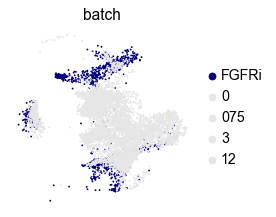

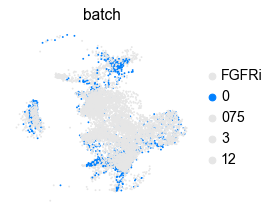

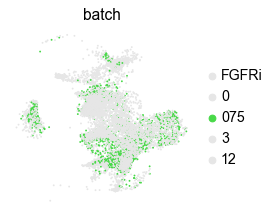

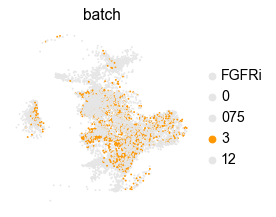

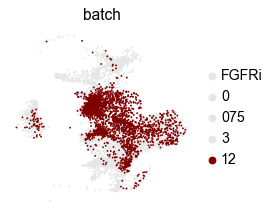

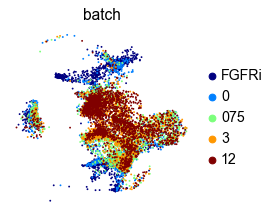

In [38]:
sc.pl.umap(adata, color=['batch'], palette=[[0,0,0.5], [0.9,0.9,0.9], [0.9,0.9,0.9],[0.9,0.9,0.9],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0,0.5,1], [0.9,0.9,0.9],[0.9,0.9,0.9],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0.9,0.9,0.9], [0.28387097,0.85,0.28387097],[0.9,0.9,0.9],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0.9,0.9,0.9], [0.9,0.9,0.9],[1,0.59259259,0],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0.9,0.9,0.9], [0.9,0.9,0.9],[0.9,0.9,0.9],[0.5,0,0]], wspace=0.5)

sc.pl.umap(adata, color=['batch'], palette=[[0,0,0.5], [0,0.5,1], [0.48387097,1,0.48387097],[1,0.59259259,0],[0.5,0,0]], wspace=0.5)

In [39]:
adata.obs['condition'] = adata.obs.batch
adata.obs.condition

AAACCCACATGAGGGT-1-FGFRi    FGFRi
AAACGAACAATAGTGA-1-FGFRi    FGFRi
AAACGCTCATTCACCC-1-FGFRi    FGFRi
AAACGCTGTCACGCTG-1-FGFRi    FGFRi
AAACGCTGTGTTCGTA-1-FGFRi    FGFRi
                            ...  
TTTGGAGGTGTTAAAG-1-12          12
TTTGGAGTCCTTATGT-1-12          12
TTTGTTGCAGAGTTGG-1-12          12
TTTGTTGTCCAACTAG-1-12          12
TTTGTTGTCCATCCGT-1-12          12
Name: condition, Length: 10653, dtype: category
Categories (5, object): [FGFRi, 0, 075, 3, 12]

In [40]:
adata

AnnData object with n_obs × n_vars = 10653 × 890
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'clusters', 'celltype', 'stage', 'umap_density_batch', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'clusters_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'celltype_colors', 'stage_colors', 'umap_density_batch_params'
    obsm: 'X_pca', 'X_umap', 'rep'


In [41]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['Reference', 'Dataset'])

In [42]:
#adata_concat.write('adataconcat_ingestall.h5ad')

In [43]:
adata_concat.obs.celltype = adata_concat.obs.celltype.astype('category')
adata_concat.obs.celltype.cat.reorder_categories(adata_ref.obs.celltype.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['colour'] = adata_ref.uns['celltype_colors']  # fix category colors

In [44]:
adata_concat.obs.stage = adata_concat.obs.stage.astype('category')
adata_concat.obs.stage.cat.reorder_categories(adata_ref.obs.stage.cat.categories, inplace=True)  # fix category ordering
#adata_concat.uns['colour'] = adata_ref.uns['celltype_colors']  # fix category colors

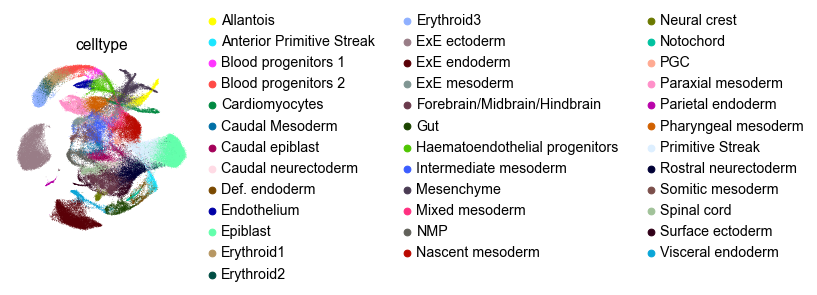

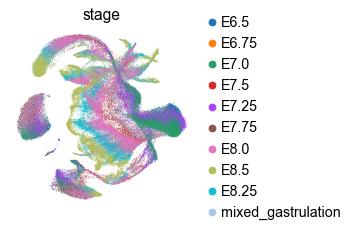

... storing 'cell' as categorical
... storing 'barcode' as categorical
... storing 'theiler' as categorical
... storing 'colour' as categorical
... storing 'clusters' as categorical
... storing 'condition' as categorical


In [ ]:
sc.pl.umap(adata_ref, color=['celltype'], save='marioni_celltype.pdf')
sc.pl.umap(adata_ref, color=['stage'], save='marioni_stage.pdf')
sc.pl.umap(adata_concat, color=['batch'], save='marioniboth_dataset.pdf')